<a href="https://colab.research.google.com/github/lucasmessias7/Desafios-Pandas/blob/main/desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [111]:
import pandas as pd

In [112]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
alunos_aula_um = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv')

### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [113]:
alunos_aula_um.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [114]:
alunos_aula_um.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [115]:
alunos_aula_um.shape

(18, 4)

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [116]:
alunos_aula_um['Nome'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18 entries, 0 to 17
Series name: Nome
Non-Null Count  Dtype 
--------------  ----- 
18 non-null     object
dtypes: object(1)
memory usage: 272.0+ bytes


In [117]:
alunos_aula_um['Idade'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18 entries, 0 to 17
Series name: Idade
Non-Null Count  Dtype
--------------  -----
18 non-null     int64
dtypes: int64(1)
memory usage: 272.0 bytes


In [118]:
alunos_aula_um['Notas'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18 entries, 0 to 17
Series name: Notas
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 272.0 bytes


In [119]:
alunos_aula_um['Aprovado'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18 entries, 0 to 17
Series name: Aprovado
Non-Null Count  Dtype
--------------  -----
18 non-null     bool 
dtypes: bool(1)
memory usage: 146.0 bytes


### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [120]:
alunos_aula_um.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [121]:
import pandas as pd

In [122]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [123]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [124]:
df.groupby('Tipo')[['Quartos']].mean()

,Quartos
Tipo,
Apartamento,2.481569


### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [125]:
duplicados = df[df['Bairro'].duplicated(keep=False) == False]
duplicados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
868,Apartamento,Saúde,2,0,0,65,1300.0,468.0,30.0
2146,Apartamento,Parque Anchieta,2,1,0,75,1000.0,NaN,NaN
3542,Apartamento,Caju,1,0,1,45,850.0,230.0,NaN
3790,Apartamento,Joá,3,2,1,400,15500.0,2500.0,550.0
23329,Apartamento,Cidade Jardim,3,2,1,196,12000.0,1700.0,190.0
24866,Apartamento,Coelho Neto,2,0,0,48,700.0,80.0,NaN
26730,Apartamento,Grumari,2,1,1,65,1900.0,NaN,NaN


### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [126]:
bairros = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).fillna(0)

In [127]:
bairros.tail(10)

,Valor
Bairro,
Vigário Geral,666.666667
Pavuna,660.833333
Pedra de Guaratiba,660.000000
Honório Gurgel,657.142857
Santíssimo,650.000000
Inhoaíba,650.000000
Cosmos,610.000000
Santa Cruz,590.000000
Paciência,510.000000


In [128]:
bairros.head(10)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
Leblon,8637.761483
Lagoa,8063.804928
São Conrado,7859.871245
Jardim Oceânico,7626.086957


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

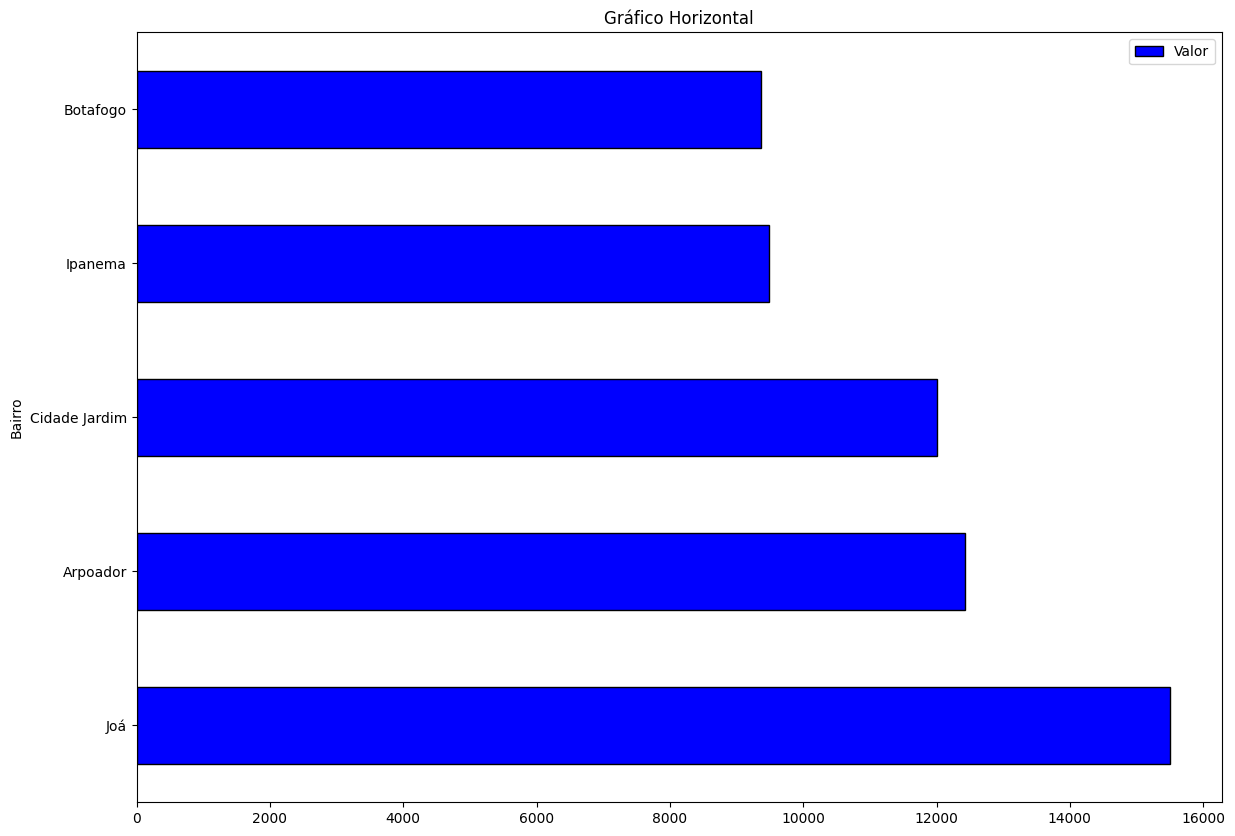

In [129]:
bairros.head(5).plot(kind='barh',figsize=(14,10), color='blue', edgecolor='black', title='Gráfico Horizontal');

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [130]:
# Importando novamente os dados
url_alunos = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
alunos = pd.read_csv(url_alunos)
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [131]:
alunos.isnull().sum()

,0
Nome,0
Idade,0
Notas,6
Aprovado,0


In [132]:
alunos = alunos.fillna(value = 0)


In [133]:
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [134]:
alunos.query('Nome == "Alice" or Nome == "Carlos"').index
alunos = alunos.drop([8,7])


In [135]:
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [136]:
alunos_aprovados = alunos.query('Aprovado == True')

alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [137]:
alunos[alunos.Aprovado == True]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [138]:
from os import name
alunos_aprovados.to_csv('alunos aprovados', index=False)

In [139]:
alunos_aprovados=pd.read_csv('alunos aprovados')

### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [140]:
alunos_aprovados.replace(7,8)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,8.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,8.0,True
6,Nadia,34,8.0,True


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [141]:
# Importando novamente os dados


In [142]:
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [143]:
alunos['Pontos_Extras'] = alunos['Notas'] * 0.4

In [144]:
alunos

,Nome,Idade,Notas,Aprovado,Pontos_Extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0
5,Bruna,23,0.0,False,0.0
6,Dara,21,7.0,True,2.8
9,Vitor,28,0.0,False,0.0
10,Daniel,21,0.0,False,0.0
11,Igor,24,4.5,False,1.8


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [145]:
from ast import Lambda
alunos['Notas_finais'] = (alunos['Pontos_Extras'] + alunos['Notas'])
alunos

,Nome,Idade,Notas,Aprovado,Pontos_Extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0
5,Bruna,23,0.0,False,0.0,0.0
6,Dara,21,7.0,True,2.8,9.8
9,Vitor,28,0.0,False,0.0,0.0
10,Daniel,21,0.0,False,0.0,0.0
11,Igor,24,4.5,False,1.8,6.3


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [146]:
alunos['Aprovados_final'] = alunos['Notas_finais'].apply(lambda x : False if x < 6  else True)

In [147]:
alunos

,Nome,Idade,Notas,Aprovado,Pontos_Extras,Notas_finais,Aprovados_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,7.0,True,2.8,9.8,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [148]:

alunos['Aprovados_apos_pontos_extras'] = alunos.apply(
    lambda row: 'Não aprovado' if row['Aprovado'] == row['Aprovados_final'] or row['Notas_finais'] == 0 else 'Aprovado', axis=1
)

In [149]:
alunos


,Nome,Idade,Notas,Aprovado,Pontos_Extras,Notas_finais,Aprovados_final,Aprovados_apos_pontos_extras
0,Ary,20,7.5,True,3.0,10.5,True,Não aprovado
1,Ana,18,0.0,False,0.0,0.0,False,Não aprovado
2,Cátia,27,2.5,False,1.0,3.5,False,Não aprovado
3,Denis,18,5.0,False,2.0,7.0,True,Aprovado
4,Beto,21,10.0,True,4.0,14.0,True,Não aprovado
5,Bruna,23,0.0,False,0.0,0.0,False,Não aprovado
6,Dara,21,7.0,True,2.8,9.8,True,Não aprovado
9,Vitor,28,0.0,False,0.0,0.0,False,Não aprovado
10,Daniel,21,0.0,False,0.0,0.0,False,Não aprovado
11,Igor,24,4.5,False,1.8,6.3,True,Aprovado
